In [1]:
# Imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

In [2]:
df=pd.read_csv("E:/M-Tech/2nd Semester/GNR-652 ( ML-1)/Homework/banknote.csv")

In [3]:
print('Sample entries in dataset')
# first 5 entries
df.head(n=5)

Sample entries in dataset


VoWTI   SoWTI   CoWTI      EoI  Class
0  3.62160  8.6661 -2.8073 -0.44699      0
1  4.54590  8.1674 -2.4586 -1.46210      0
2  3.86600 -2.6383  1.9242  0.10645      0
3  3.45660  9.5228 -4.0112 -3.59440      0
4  0.32924 -4.4552  4.5718 -0.98880      0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VoWTI   1372 non-null   float64
 1   SoWTI   1372 non-null   float64
 2   CoWTI   1372 non-null   float64
 3   EoI     1372 non-null   float64
 4   Class   1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


<IPython.core.display.Javascript object>

<AxesSubplot:>

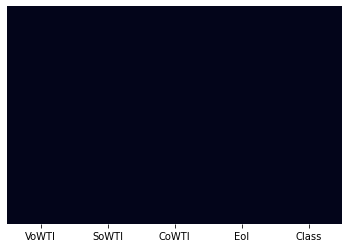

In [5]:
# Checking for any missing or null values using the heatmap due to many samples availaible

sns.heatmap(df.isna(),yticklabels=False,cbar=False)

In [6]:
# Stastical feature description and distribution of datasets
df.describe()

VoWTI        SoWTI        CoWTI          EoI        Class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000

In [7]:
# Scaling or Normalizing
std_scalar = StandardScaler()

df['VoWTI'] = std_scalar.fit_transform(df['VoWTI'].values.reshape(-1,1))
df['SoWTI'] = std_scalar.fit_transform(df['SoWTI'].values.reshape(-1,1))
df['CoWTI'] = std_scalar.fit_transform(df['CoWTI'].values.reshape(-1,1))
df['EoI'] = std_scalar.fit_transform(df['EoI'].values.reshape(-1,1))

print(df)

         VoWTI     SoWTI     CoWTI       EoI  Class
0     1.121806  1.149455 -0.975970  0.354561      0
1     1.447066  1.064453 -0.895036 -0.128767      0
2     1.207810 -0.777352  0.122218  0.618073      0
3     1.063742  1.295478 -1.255397 -1.144029      0
4    -0.036772 -1.087038  0.736730  0.096587      0
...        ...       ...       ...       ...    ...
1367 -0.009711 -0.097693 -0.660962  0.300996      1
1368 -0.641313 -1.158984  1.179023  0.730127      1
1369 -1.472357 -2.621646  3.759017 -0.754884      1
1370 -1.406693 -1.756471  2.552043 -0.043158      1
1371 -1.047122 -0.439822  0.298616  1.136464      1

[1372 rows x 5 columns]


In [8]:
# Anaylsing the distribution of classes
# data["column_name"].value_counts(), returns unique values in that column

print(df['Class'].value_counts())
print('Fake', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Original', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

0    762
1    610
Name: Class, dtype: int64
Fake 55.54 % of the dataset
Original 44.46 % of the dataset


In [9]:
Orig_df = df.loc[df['Class'] == 1][0:25] # smaples which have fraud
Fake_df = df.loc[df['Class'] == 0][0:25] #   

normal_distributed_df = pd.concat([Orig_df, Fake_df])

# Shuffle dataframe rows
df = normal_distributed_df.sample(frac=1, random_state=2)

print(df['Class'].value_counts()/len(df))

1    0.5
0    0.5
Name: Class, dtype: float64


In [10]:
#Feature matrix # separating dependent and independent feature
X = df.drop("Class",axis=1) 
y = df["Class"]

In [11]:
# Train-Test split

# Following an 80-20 split on data.
# That is, 80% examples would be used as the training set with known labels,
# and performance of the KNN algorithm will be tested on the 20% remaining unseen examples.

# The dataset is shuffled with 20 as the random seed for reproducible results.
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=2, test_size=0.20)

print("Number of train samples: ", len(X_train))
print("Number of test samples: ", len(X_test))

Number of train samples:  40
Number of test samples:  10


In [12]:
# Feature normalization
# Refer to https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Fit model to training data

# Refer: https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification and
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
# Evaluate on test data 
y_pred = classifier.predict(X_test)

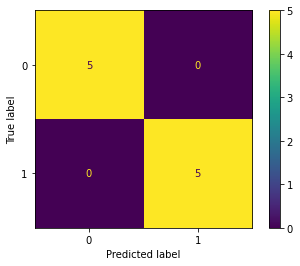

In [15]:
# Confusion Matrix
class_labels = df['Class'].unique()
cm = confusion_matrix(y_test, y_pred, labels=class_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot()

In [16]:
# Performance Statistics
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [17]:
# line graph plot
def simple_line_plot(y_values, x_values, title, xtitle, ytitle):
    """Plots a lineplot for given data."""
    plt.figure(figsize=(10,5))
    plt.plot(x_values, y_values, marker='o')
    plt.title(title)
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.show()

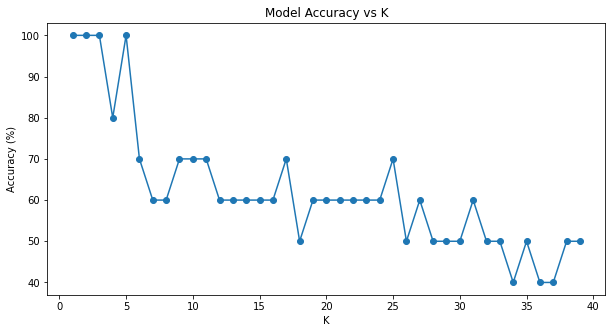

The model achieves 100% Test accuracy for K = [0, 1, 2, 4]


In [18]:
#testing out performance of the KNN algorithm for different values of K
accuracies = []

K_vals = list(range(1, 40))

for k in K_vals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    accuracies.append((1-np.mean(pred_i != y_test))*100)
    
simple_line_plot(accuracies, K_vals, 'Model Accuracy vs K', 
                'K', 'Accuracy (%)')

accuracies=np.array(accuracies)

print("The model achieves 100% Test accuracy for K =", list(np.where(accuracies==100)[0]))